In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("ground_water_quality_2018_post.csv")
df2=pd.read_csv("ground_water_quality_2020_post.csv")
df3=pd.read_csv("ground_water_quality_2020_post.csv")

In [3]:
df=pd.concat([df1,df2,df3],axis=0)

In [4]:
df.shape

(1110, 27)

In [5]:
df

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1,Unnamed: 8
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,...,49.00,4.00,48.0,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.,NaN
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,...,42.00,5.00,56.0,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.,NaN
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,...,45.00,2.00,24.0,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.,NaN
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,...,27.00,1.00,32.0,19.448,159.967105,0.928155,C2S1,0.000658,P.S.,NaN
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,...,298.00,5.00,56.0,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,375,YADADRI,S.Narayanpur,S.Narayanpur,17.144719,78.860010,9.90,Post-monsoon 2020,7.80,2324,...,169.30,2.60,160.0,97.240,799.835526,2.602728,C4S1,-8.596711,P.S.,NaN
364,376,YADADRI,Thurkapally,Gandamalla,17.733101,78.853831,5.74,Post-monsoon 2020,8.26,2109,...,211.30,43.30,48.0,116.688,599.802632,3.751176,C3S1,-3.396053,P.S.,NaN
365,377,YADADRI,Valigonda,T. somaram,17.399953,78.952290,1.72,Post-monsoon 2020,8.77,1115,...,60.44,3.04,80.0,53.482,419.909539,1.282386,C3S1,-4.398191,P.S.,NaN
366,378,YADADRI,Valigonda,Vemulakonda,17.347782,79.143433,1.65,Post-monsoon 2020,7.76,5053,...,465.20,3.30,400.0,92.378,1379.843750,5.444988,C4S1,-21.996875,P.S.,NaN


In [6]:
df=df.iloc[:,:-12]

In [7]:
df.columns

Index(['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl',
       'season', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F'],
      dtype='object')

In [8]:
df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       358, 359, 360, 361, 362, 363, 364, 365, 366, 367],
      dtype='int64', length=1110)

In [9]:
df.columns

Index(['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl',
       'season', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F'],
      dtype='object')

In [10]:
X=df.drop(['sno', 'district', 'mandal', 'village', 'gwl','season'],axis=1).values

In [11]:
y=df['gwl'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train=scaler.fit_transform(X_train)

In [17]:
X_test=scaler.transform(X_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [19]:
X_train.shape

(777, 9)

In [20]:
model=Sequential()
optimizer = Adam()
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(1))
model.compile(optimizer,loss='mse')

In [21]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
         batch_size=64,
         epochs=500)

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 117.3086 - val_loss: 115.7209
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 101.5103 - val_loss: 113.5162
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 106.0334 - val_loss: 110.8417
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98.6820 - val_loss: 107.5621
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 95.8654 - val_loss: 103.4753
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87.7415 - val_loss: 98.5796
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 97.1920 - val_loss: 92.6949
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82.2484 - val_loss: 86.2101
Epoch 9/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79.1252 - val_loss: 79.2701
Epoch 10/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67.6487 - val_loss: 72.4788
Epoch 11/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60.3190 - val_loss: 66.4928
Epoch 12/500
13/13 ━━━━━━━━━━━━━━

In [22]:
losses=pd.DataFrame(model.history.history)

<Axes: >

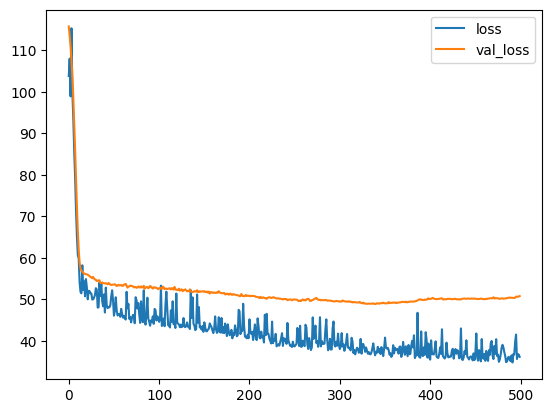

In [23]:
losses.plot()

In [24]:
predict=model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


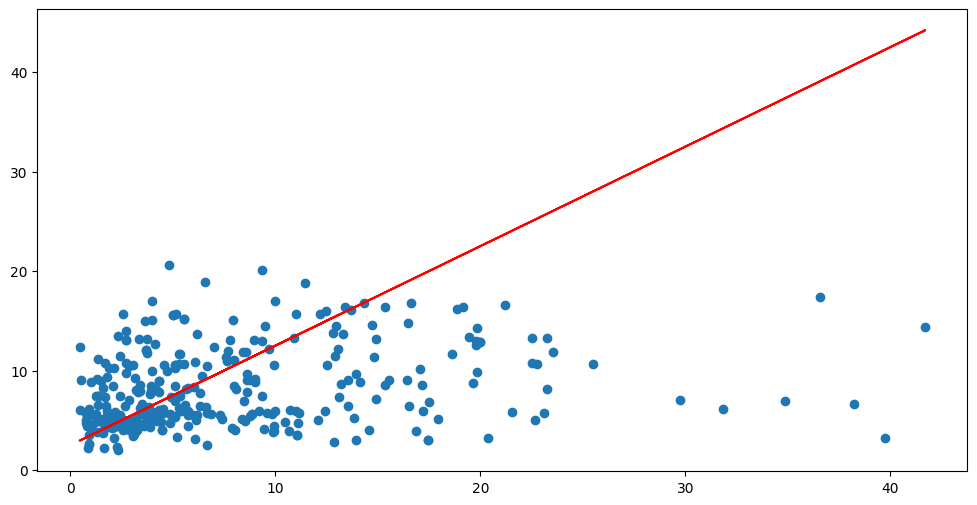

In [25]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predict)
plt.plot(y_test,((5/2)+y_test),'r')

In [26]:
from sklearn.metrics import mean_squared_error,explained_variance_score

In [27]:
mean_squared_error(y_test,predict)

50.3172381462097

In [28]:
predlist=[]

In [29]:
for i in range(20):
    m=df.drop(['sno', 'district', 'mandal', 'village', 'gwl','season'],axis=1).iloc[i]
    m=scaler.transform(m.values.reshape(-1,9))
    predlist.append(model.predict(m))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [30]:
real=[]

In [31]:
first_20_col1 = df['gwl'].head(20).tolist()
real.extend(first_20_col1)



In [32]:
real=np.array(real)

In [33]:
real

array([ 5.09,  5.1 ,  4.98,  5.75,  2.15,  8.8 ,  3.95,  3.7 ,  3.12,
       15.6 ,  5.59,  5.36,  6.02, 11.75,  2.68,  1.6 , 16.22,  2.58,
        4.34,  3.59])

In [34]:
predlist=np.array(predlist)

In [35]:
predlist=predlist.reshape(20)

In [36]:
predlist

array([5.3719244, 5.180031 , 5.190357 , 5.5496182, 4.7699885, 5.182225 ,
       4.1257887, 4.6270466, 5.0199394, 6.975308 , 6.494612 , 7.488543 ,
       5.5428195, 5.8428793, 5.687086 , 5.10597  , 5.6202555, 5.5865393,
       6.054848 , 5.536341 ], dtype=float32)

In [37]:
Final_df = pd.DataFrame({'Gwl Real': real, 'Gwl Predicted': predlist})

In [38]:
Final_df

,Gwl Real,Gwl Predicted
0,5.09,5.371924
1,5.10,5.180031
2,4.98,5.190357
3,5.75,5.549618
4,2.15,4.769989
5,8.80,5.182225
6,3.95,4.125789
7,3.70,4.627047
8,3.12,5.019939
9,15.60,6.975308
